# <center>Tareas - Modelado y Simulación 2020-1
**Este cuaderno es una recopilación de todos los diferentes cuadernos en los que estuve realizando algunas de las tareas propuestas a lo largo del curso. Por: Juan Sebastian Aranzazu Serna**

## Tarea : Solución de problemas de valor inicial


In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#Euler iterativo para calculos de tangente
def euler(dx,xo,ti,tf):
  h =0.001
  t = np.arange(ti,tf,h)
  x = np.zeros(len(t))
  x[0]=xo
  for i in range(1,len(t)):
    x[i]= x[i-1] + h*dx(t[i-1],x[i-1])
        
  return t,x

#Runge Kutta iterativo para solución de ecuaciones diferenciales ordinarias
def kutta(dx,xo,ti,tf):
  h = 0.001 
  t = np.arange(ti,tf,h)
  x = np.zeros(len(t))
  x[0] = xo
    
  for i in range(1,len(t)):
      k_1 = dx(t[i-1],x[i-1])
      k_2 = dx(t[i-1] + (h/2),x[i-1]+(h/2)*k_1)
      k_3 = dx(t[i-1] + (h/2),x[i-1]+(h/2)*k_2)
      k_4 = dx(t[i-1] + h,x[i-1]+h*k_3)
      x[i] = x[i-1] + (h/6)*(k_1 + 2*k_2 + 2*k_3 + k_4)
  return t,x 

def flujos(iniciales,ti,tf,dx):
  y = np.zeros((len(iniciales),int((tf-ti)/0.001)))
  for i in range(len(iniciales)):
      t,y[i,:] = euler(dx,iniciales[i],ti,tf)
      plt.plot(t,y[i,:])
  plt.grid()
  plt.xlabel('t')
  plt.ylabel('x')  

Lineal $\dot{x} = ax$

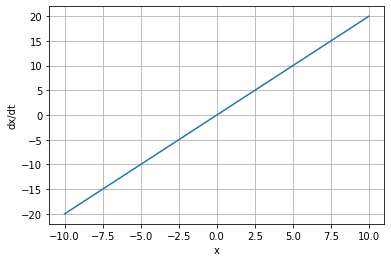

In [3]:
fs = 1000
t = np.arange(-10,10,1/fs)
x = t

def dx(t,x):
    a = 2
    return a*x

d_x = dx(t,x)
plt.plot(t,d_x)
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.grid()

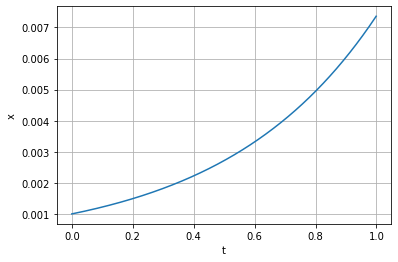

In [4]:
xo = 0.001
ti,tf = 0,1
t,x = euler(dx,xo,ti,tf)
plt.plot(t,x)
plt.xlabel("t")
plt.ylabel("x")
plt.grid()

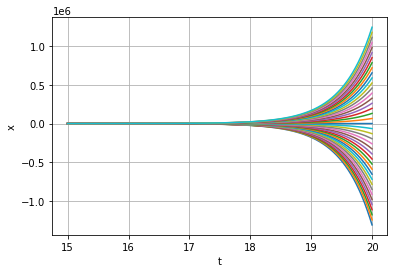

In [5]:
#Flujos
inciciales = np.arange(-60,60, 3)
flujos(inciciales,15,20,dx)

No lineal $\dot{x} = sin(x)$

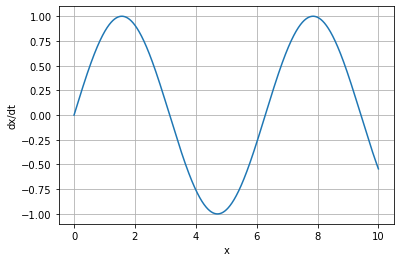

In [6]:
fs = 10000 
t = np.arange(0,10,1/fs)
x = t 
def dx(t,x):
    f = 1/(2*np.pi)
    return np.sin(x*2*np.pi*f)

d_x = dx(t,x)

plt.plot(t,d_x)
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.grid()

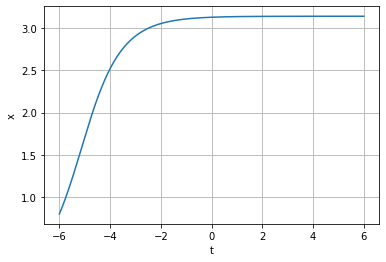

In [7]:
xo = 0.8
ti,tf = -6,6
t,x = euler(dx,xo,ti,tf)
plt.plot(t,x)
plt.xlabel("t")
plt.ylabel("x")
plt.grid()

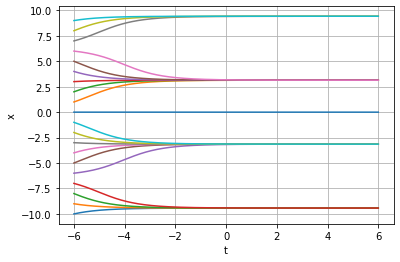

In [8]:
#Flujos
inciciales = np.arange(-10,10, 1)
flujos(inciciales,-6,6,dx)

Ecuación logística  $\dot{x} = Rx(1- \frac{x}{K})$


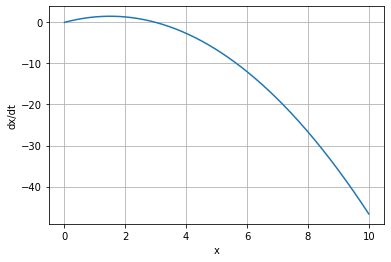

In [9]:
fs = 10000 
t = np.arange(0,10,1/fs)
x = t 
def dx(t,x):
    R = 2
    K = 3
    return R*x*(1-x/K)

d_x = dx(t,x)

plt.plot(t,d_x)
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.grid()

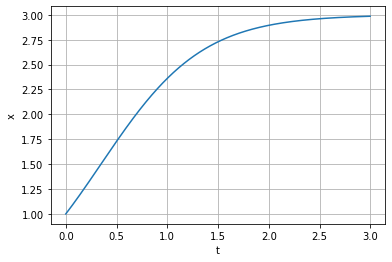

In [10]:
xo = 1
ti,tf = 0,3
t,x = euler(dx,xo,ti,tf)
plt.plot(t,x)
plt.xlabel("t")
plt.ylabel("x")
plt.grid()

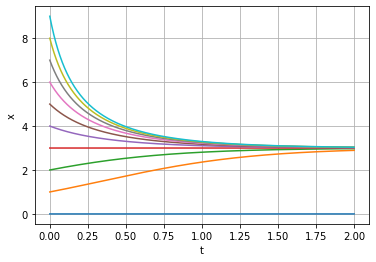

In [11]:
#Flujos 
inciciales = np.arange(0,10, 1)
flujos(inciciales,0,2,dx)

Circuito RC transladado (lineal) $\dot{x} = \frac{1}{RC}x$


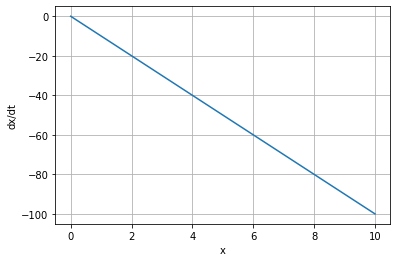

In [12]:
fs = 10000 
t = np.arange(0,10,1/fs)
x = t 
def dx(t,x):
    R = 1000
    C = 0.0001
    return -x*(1/(R*C))

d_x = dx(t,x)
plt.plot(t,d_x)
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.grid()

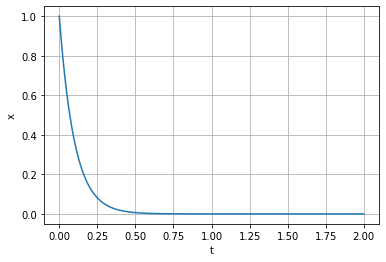

In [15]:
xo = 1
ti,tf = 0,2
t,x = euler(dx,xo,ti,tf)
plt.plot(t,x)
plt.xlabel("t")
plt.ylabel("x")
plt.grid()

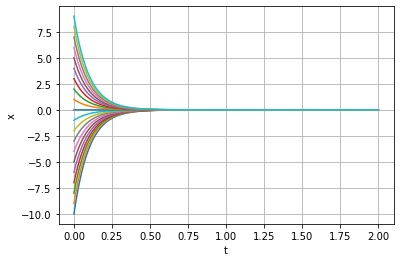

In [16]:
#Flujos
inciciales = np.arange(-10,10, 1)
flujos(inciciales,0,2,dx)

## Ejercicios Strogatz Capítulo 2

In [17]:
from scipy.integrate import solve_ivp

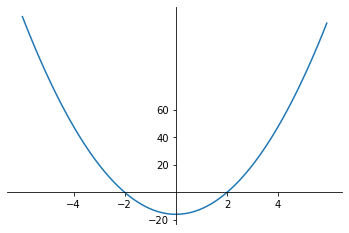

In [18]:
# Ejercicio 2.2.1

x = np.arange(-6,6,.1)
dx = 4*(x**2)-16


fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_xticks([-4,-2,2,4])
ax.set_yticks([-20,20,40,60])

plt.plot(x,dx)
plt.show()

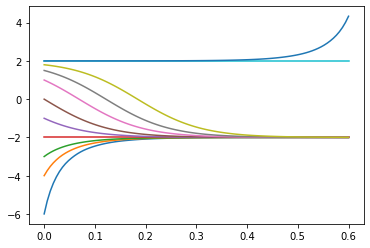

In [19]:
def dx(t, x, c, d): return c*(x**2)-d

a,b = 4,16
x0 = np.array([-6, -4, -3, -2,-1,0, 1, 1.5, 1.8, 2, 2.0001])
tspan = [0, 0.6]
sol = solve_ivp(dx, tspan, x0,args=(a,b),\
                dense_output = True)

t = np.linspace(tspan[0],tspan[1],101)
x = sol.sol(t)
for i in range(x0.size):
  plt.plot(t,x[i])
plt.show()

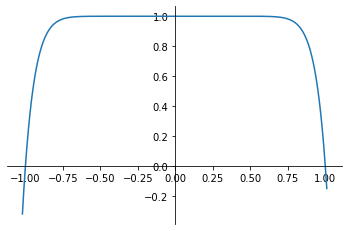

In [22]:
# Ejercicio 2.2.2 x_dot = 1-x**14

x = np.arange(-1.02,1.02,.01)
dx = 1-x**14


fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.plot(x,dx)
plt.show()

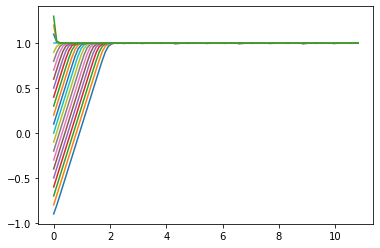

In [23]:
def dx(t, x): 
  return  1-x**14

x0 = np.arange(-0.900000,1.40000,0.1)
tspan = [0, 10.809]
sol = solve_ivp(dx, tspan, x0, \
                dense_output = True)

t = np.linspace(tspan[0],tspan[1],101)
x = sol.sol(t)
for i in range(x0.size):
  plt.plot(t,x[i])
plt.show()

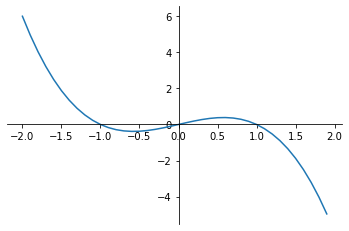

In [20]:
#Ejercicio 2.2.3

x = np.arange(-2,2,.1)
dx = x-(x**3)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.plot(x,dx)
plt.show()

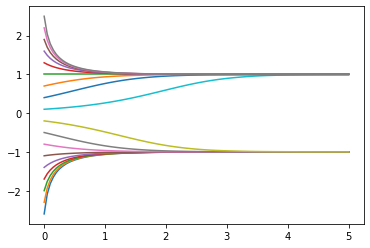

-1.0000328773154354

In [21]:
def dx(t, x): return x-(x**3)


x0 = np.arange(-2.6,2.6,0.3)
tspan = [0, 5]
sol = solve_ivp(dx, tspan, x0,\
                dense_output = True)
t = np.linspace(tspan[0],tspan[1],101)
x = sol.sol(t)
for i in range(x0.size):
  
  plt.plot(t,x[i])
plt.show()
x[0,-1]

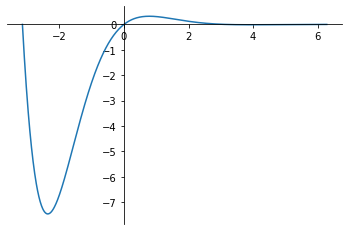

In [24]:
#Ejercicio 2.2.4 x_dot = np.exp(-x)*np.sin(x)
x = np.arange(-np.pi,np.pi*2,.01)
dx = np.exp(-x)*np.sin(x)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.plot(x,dx)
plt.show()

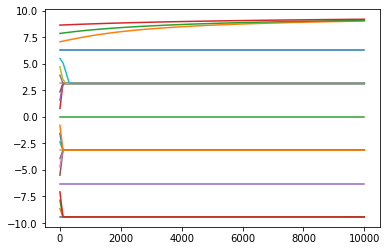

In [25]:
def dx(t, x): 
  return  np.exp(-x)*np.sin(x)

x0 = np.arange(-3*np.pi,3*np.pi,np.pi/4)
tspan = [0, 10000]
sol = solve_ivp(dx, tspan, x0, \
                method = 'Radau', dense_output = True)

t = np.linspace(tspan[0],tspan[1],101)
x = sol.sol(t)
for i in range(x0.size):
  plt.plot(t,x[i])
plt.show()

## Bifurcaciones

Tridente

Text(0, 0.5, 'dx/dt')

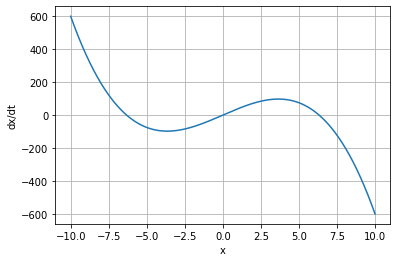

In [26]:
fs = 1000
t = np.arange(-10,10,1/fs)
x = np.arange(-10,10,1/fs)
def dx(t,x):
    r = 1
    return 40*x - x**3
d_x = dx(t,x)
plt.plot(x,d_x)
plt.grid()
plt.xlabel('x')
plt.ylabel('dx/dt')

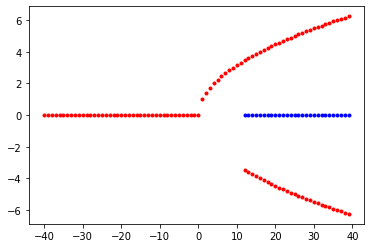

In [28]:
def bisection(dx,x_m,x_p):
    diff = np.abs(x_m-x_p)
    f_x_p =  dx(x_p)

    while diff>tol: 
        x_next = (x_m + x_p)/2
        f_x_next =  dx(x_next)
        f_x_p =  dx(x_p)
        if f_x_next*f_x_p >0:
            x_p = x_next 
        else:
            x_m = x_next 
        diff = np.abs(x_m-x_p)
    return x_m

def find_all_zeros(dx,x_m,x_p):
    x_zeros = []
    x_zero = bisection(dx,x_m,x_p)
    while x_zero != x_m:
        x_zeros.append(x_zero)
        x_p = x_zero - tol
        x_zero = bisection(dx,x_m,x_p)
        #print(x_zero)
    return x_zeros


tol = 1e-12
r = np.arange(-40,40,1)
for i in r:
    x_m = -10
    x_p = 10
    dx__ = lambda x: i*x - x**3
    zeros = find_all_zeros(dx__,x_m,x_p)
    for j in zeros:
        if dx__(j-tol)>dx__(j+tol):
            plt.plot(i,j,'r.')
        else:
            plt.plot(i,j,'b.')

## Equaciones de Lorenz

$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$


In [29]:
from mpl_toolkits.mplot3d import axes3d
from scipy.integrate import solve_ivp

In [30]:
def Lorenz_eq(t,xyz,sigma,beta,rho):
    x,y,z = xyz
    return [sigma*(y-x),x*(rho-z)-y,x*y-beta*z]

In [31]:
time = [0,100]
t = np.arange(time[0],time[1],0.001)
init_condi = [1,1,0]
solucion = solve_ivp(Lorenz_eq,time,init_condi,args=[10,8/3,28],t_eval=t)

t = solucion.t
x = solucion.y[0,:]
y = solucion.y[1,:]
z = solucion.y[2,:]

Text(0.5, 0, 'z')

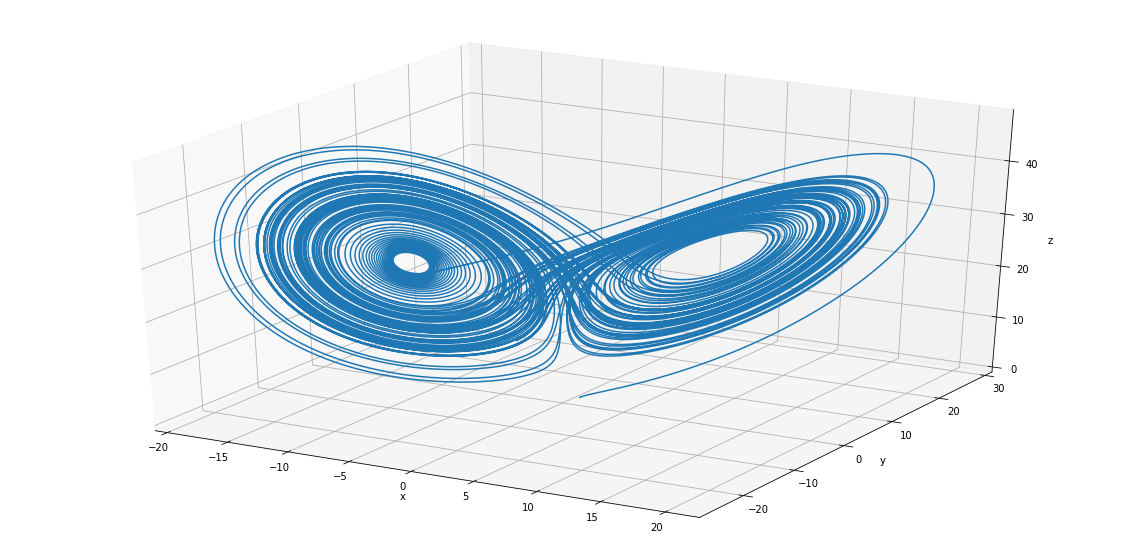

In [32]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
ax.plot3D(x,y,z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Text(0.5, 0, 't')

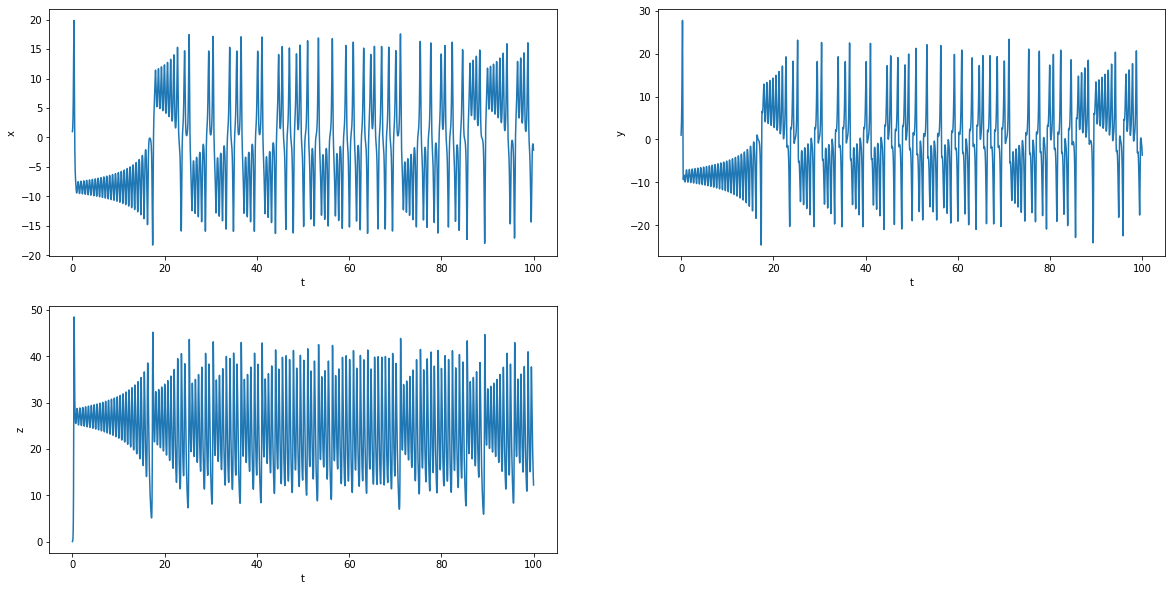

In [33]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(t,x)
plt.ylabel('x')
plt.xlabel('t')

plt.subplot(2,2,2)
plt.plot(t,y)
plt.ylabel('y')
plt.xlabel('t')

plt.subplot(2,2,3)
plt.plot(t,z)
plt.ylabel('z')
plt.xlabel('t')

Diagrama de bifurcaciones


In [34]:
def event_lorenz(t,xyz,sigma,beta,rho):
    x,y,z = xyz
    return x+y

event_lorenz.direction = -1

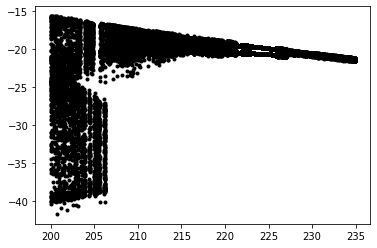

In [35]:
time = [0,50]
t = np.linspace(time[0],time[1],10000)
init_condi = [0.1,0.1,0.1]

rs = np.arange(200,235,0.1)
for r in rs:
    solucion = solve_ivp(Lorenz_eq,time,init_condi,events=[event_lorenz],args=[10,8/3,r],t_eval=t)
    for i,t_ in enumerate(solucion.t_events[0]):
        if t_ > 20:
            plt.plot(r,solucion.y_events[0][i,1],'.k')
    init_condi = solucion.y[:,-1]